

**CIFAR-10  is an established computer-vision dataset used for object recognition. It is a subset of the 80 million tiny images dataset and consists of 60,000 32x32 color images containing one of 10 object classes, with 6000 images per class. It was collected by Alex Krizhevsky, Vinod Nair, and Geoffrey Hinton**

**Importing Libraries**

In [57]:
import tensorflow as tf
from tensorflow.keras import datasets,layers,models
import matplotlib.pyplot as plt
import numpy as np

In [58]:
(X_train,y_train),(X_test,y_test)=datasets.cifar10.load_data()

In [59]:
X_train.shape

(50000, 32, 32, 3)

In [60]:
X_test.shape

(10000, 32, 32, 3)

In [61]:
y_train.shape

(50000, 1)

In [62]:
y_train[:5]

array([[6],
       [9],
       [9],
       [4],
       [1]], dtype=uint8)


y_train is a 2D array, for our classification having 1D array is good enough. so we will convert this to now 1D array

In [63]:
y_train = y_train.reshape(-1,)
y_train[:5]

array([6, 9, 9, 4, 1], dtype=uint8)

In [64]:
y_test = y_test.reshape(-1,)

In [65]:
classes = ["airplane","automobile","bird","cat","deer","dog","frog","horse","ship","truck"]

Let's plot some images to see what they are

In [66]:
def plot_sample(X, y, index):
    plt.figure(figsize = (15,2))
    plt.imshow(X[index])
    plt.xlabel(classes[y[index]])

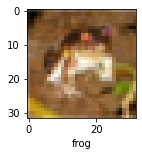

In [67]:
plot_sample(X_train, y_train, 0)

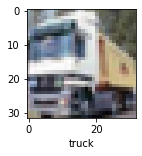

In [68]:
plot_sample(X_train, y_train, 1)

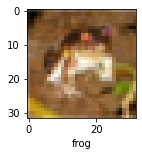

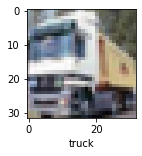

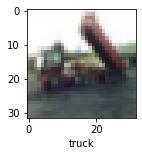

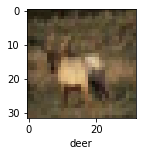

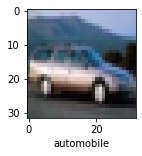

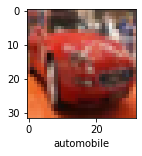

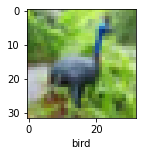

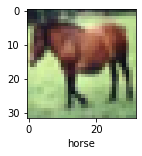

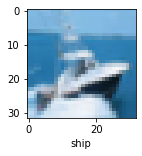

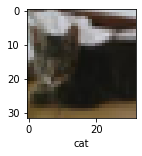

In [69]:
for i in range(10):
  plot_sample(X_train, y_train, i)

Normalize the images to a number from 0 to 1. Image has 3 channels (R,G,B) and each value in the channel can range from 0 to 255. Hence to normalize in 0-->1 range, we need to divide it by 255

In [70]:
X_train[0]

array([[[ 59,  62,  63],
        [ 43,  46,  45],
        [ 50,  48,  43],
        ...,
        [158, 132, 108],
        [152, 125, 102],
        [148, 124, 103]],

       [[ 16,  20,  20],
        [  0,   0,   0],
        [ 18,   8,   0],
        ...,
        [123,  88,  55],
        [119,  83,  50],
        [122,  87,  57]],

       [[ 25,  24,  21],
        [ 16,   7,   0],
        [ 49,  27,   8],
        ...,
        [118,  84,  50],
        [120,  84,  50],
        [109,  73,  42]],

       ...,

       [[208, 170,  96],
        [201, 153,  34],
        [198, 161,  26],
        ...,
        [160, 133,  70],
        [ 56,  31,   7],
        [ 53,  34,  20]],

       [[180, 139,  96],
        [173, 123,  42],
        [186, 144,  30],
        ...,
        [184, 148,  94],
        [ 97,  62,  34],
        [ 83,  53,  34]],

       [[177, 144, 116],
        [168, 129,  94],
        [179, 142,  87],
        ...,
        [216, 184, 140],
        [151, 118,  84],
        [123,  92,  72]]

**Normalizing the training data**

In [71]:
X_train=X_train/255
X_test=X_test/255

**Build simple artificial neural network for image classification**

In [72]:
ann=models.Sequential([
                      layers.Flatten(input_shape=(32,32,3)),
                      layers.Dense(3000,activation='relu'),
                      layers.Dense(1000,activation='relu'),
                      layers.Dense(10,activation='softmax')
])

ann.compile(optimizer='SGD',
            loss='sparse_categorical_crossentropy',
            metrics=['accuracy']
            )
ann.fit(X_train,y_train,epochs=5)

Epoch 1/5
1563/1563 [==============================] - 64s 41ms/step - loss: 1.9300 - accuracy: 0.3071
Epoch 2/5
1563/1563 [==============================] - 63s 41ms/step - loss: 1.6466 - accuracy: 0.4193
Epoch 3/5
1563/1563 [==============================] - 84s 54ms/step - loss: 1.5524 - accuracy: 0.4536
Epoch 4/5
1563/1563 [==============================] - 65s 42ms/step - loss: 1.4880 - accuracy: 0.4765
Epoch 5/5
1563/1563 [==============================] - 66s 42ms/step - loss: 1.4329 - accuracy: 0.4950


**You can see that at the end of 5 epochs, accuracy is at around 49%**

In [73]:
from sklearn.metrics import confusion_matrix , classification_report
import numpy as np
y_pred = ann.predict(X_test)
y_pred_classes = [np.argmax(element) for element in y_pred]

print("Classification Report: \n", classification_report(y_test, y_pred_classes))

Classification Report: 
               precision    recall  f1-score   support

           0       0.60      0.53      0.56      1000
           1       0.60      0.55      0.57      1000
           2       0.45      0.22      0.30      1000
           3       0.39      0.28      0.33      1000
           4       0.46      0.33      0.38      1000
           5       0.44      0.32      0.37      1000
           6       0.57      0.47      0.52      1000
           7       0.34      0.74      0.47      1000
           8       0.72      0.49      0.58      1000
           9       0.39      0.74      0.51      1000

    accuracy                           0.47     10000
   macro avg       0.50      0.47      0.46     10000
weighted avg       0.50      0.47      0.46     10000



**Now let us build a convolutional neural network to train our images**

In [74]:
cnn=models.Sequential([
                       #cnn
                      layers.Conv2D(filters=32,kernel_size=(3,3),activation='relu',input_shape=(32,32,3)),
                      layers.MaxPool2D((2,2)),
                       
                      layers.Conv2D(filters=64,kernel_size=(3,3),activation='relu',input_shape=(32,32,3)),
                      layers.MaxPool2D((2,2)),


                      layers.Flatten(),
                      layers.Dense(64,activation='relu'),
                      layers.Dense(10,activation='softmax')
])

In [75]:
cnn.compile(optimizer='adam',
            loss='sparse_categorical_crossentropy',
            metrics=['accuracy']
            )
cnn.fit(X_train,y_train,epochs=15)

Epoch 1/15
1563/1563 [==============================] - 33s 21ms/step - loss: 1.7020 - accuracy: 0.3796
Epoch 2/15
1563/1563 [==============================] - 33s 21ms/step - loss: 1.1482 - accuracy: 0.6009
Epoch 3/15
1563/1563 [==============================] - 33s 21ms/step - loss: 0.9918 - accuracy: 0.6509
Epoch 4/15
1563/1563 [==============================] - 33s 21ms/step - loss: 0.8884 - accuracy: 0.6898
Epoch 5/15
1563/1563 [==============================] - 33s 21ms/step - loss: 0.8181 - accuracy: 0.7174
Epoch 6/15
1563/1563 [==============================] - 33s 21ms/step - loss: 0.7635 - accuracy: 0.7329
Epoch 7/15
1563/1563 [==============================] - 32s 21ms/step - loss: 0.7043 - accuracy: 0.7576
Epoch 8/15
1563/1563 [==============================] - 32s 21ms/step - loss: 0.6526 - accuracy: 0.7755
Epoch 9/15
1563/1563 [==============================] - 32s 21ms/step - loss: 0.6186 - accuracy: 0.7817
Epoch 10/15
1563/1563 [==============================] - 32s 21m

**With CNN, at the end 5 epochs, accuracy was at around 70% which is a significant improvement over ANN. CNN's are best for image classification and gives superb accuracy. Also computation is much less compared to simple ANN as maxpooling reduces the image dimensions while still preserving the features**

In [76]:
cnn.evaluate(X_test,y_test)

313/313 [==============================] - 2s 7ms/step - loss: 1.0175 - accuracy: 0.7012


[1.0174833536148071, 0.701200008392334]

In [77]:
y_pred = cnn.predict(X_test)
y_pred[:5]

array([[8.12147482e-05, 1.96988481e-06, 1.41375745e-02, 7.73873985e-01,
        3.35723790e-03, 1.19984426e-01, 1.36661038e-04, 1.78734826e-05,
        8.84045511e-02, 4.54319797e-06],
       [1.04856743e-04, 3.26600252e-03, 1.96745845e-07, 7.16257631e-08,
        1.37164136e-06, 2.05939266e-09, 1.88875924e-06, 2.16734164e-09,
        9.96625662e-01, 5.05848234e-08],
       [1.13191411e-01, 8.12925994e-02, 4.79944656e-03, 2.30205469e-02,
        7.98262842e-03, 6.59315987e-03, 4.02040954e-04, 3.86217213e-03,
        7.43982673e-01, 1.48732970e-02],
       [9.89394844e-01, 1.23802444e-03, 2.07738671e-03, 2.59463908e-04,
        6.31725183e-04, 3.23251606e-06, 8.25746756e-05, 4.11917853e-07,
        5.92849078e-03, 3.83961422e-04],
       [6.91562263e-07, 6.84962151e-06, 1.25749588e-01, 1.55878395e-01,
        3.44781995e-01, 1.79039911e-04, 3.73396337e-01, 2.64162026e-10,
        7.08328571e-06, 7.95507482e-09]], dtype=float32)

In [78]:
y_classes = [np.argmax(element) for element in y_pred]
y_classes[:5]

[3, 8, 8, 0, 6]

In [79]:
y_test[:5]

array([3, 8, 8, 0, 6], dtype=uint8)

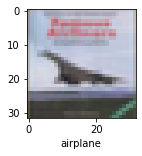

In [80]:
plot_sample(X_test, y_test,3)

In [81]:
classes[y_classes[3]]

'airplane'

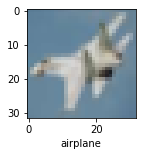

In [82]:
plot_sample(X_test, y_test,10)

In [83]:
classes[y_classes[10]]

'airplane'

In [84]:
from sklearn.metrics import confusion_matrix , classification_report
import numpy as np
y_pred = cnn.predict(X_test)
y_pred_classes = [np.argmax(element) for element in y_pred]

print("Classification Report: \n", classification_report(y_test, y_pred_classes))

Classification Report: 
               precision    recall  f1-score   support

           0       0.73      0.76      0.74      1000
           1       0.82      0.80      0.81      1000
           2       0.55      0.69      0.61      1000
           3       0.54      0.50      0.52      1000
           4       0.72      0.56      0.63      1000
           5       0.62      0.60      0.61      1000
           6       0.76      0.79      0.77      1000
           7       0.80      0.71      0.75      1000
           8       0.80      0.79      0.79      1000
           9       0.73      0.82      0.77      1000

    accuracy                           0.70     10000
   macro avg       0.70      0.70      0.70     10000
weighted avg       0.70      0.70      0.70     10000

